In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
import os
import tarfile
import urllib
import numpy as np


pd.options.plotting.backend = 'matplotlib'
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"

HOUSING_PATH = os.path.join('datasets', 'housing')

HOUSING_URL = "%sdatasets/housing/housing.tgz" % DOWNLOAD_ROOT
# info fetching:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()


def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, " hous ing . csv ".replace(' ', ''))
    return pd.read_csv(csv_path)

In [2]:
HOUSING_URL

'https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz'

In [3]:
# fetch_housing_data()
# housing = load_housing_data()
# housing.head()

housing = pd.read_csv(r'./../../datasets/housing/housing.csv')

In [4]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
a = housing['ocean_proximity'].value_counts()

b = housing['ocean_proximity'].describe()

print(a, b, sep='\n\n\n')

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object


In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Test sample

In [8]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)

print(f'{len(train_set)} train set + {len(test_set)} test set')

16512 train set + 4128 test set


In [26]:
import sklearn as sk
import sklearn.model_selection as ms

# The same
train_set, test_set = ms.train_test_split(housing, test_size=0.2, random_state=42)
print(f'{len(train_set)} train set + {len(test_set)} test set')

16512 train set + 4128 test set


<AxesSubplot:>

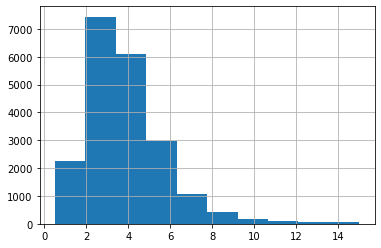

In [38]:
housing['median_income'].hist()

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

<Figure size 720x432 with 0 Axes>

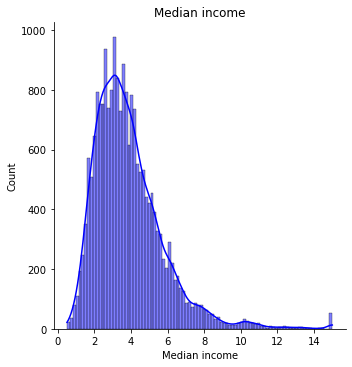

In [47]:
plt.figure(figsize=(10,6))
sns.displot(housing["median_income"], kde=True, color="blue")
plt.title("Median income")
plt.xlabel("Median income")
plt.show()

### Discretize 'median_income' category

<AxesSubplot:>

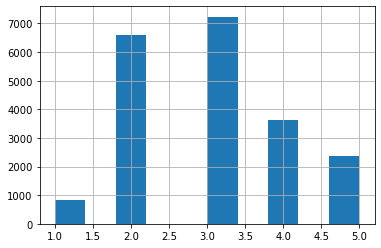

In [48]:
housing['income_category'] = pd.cut(housing['median_income'],
                                   bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                   labels=range(1, 6))

housing['income_category'].hist()
# px.histogram(housing.income_category).update_layout(bargap=0.2)

In [52]:
split = ms.StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

split

StratifiedShuffleSplit(n_splits=1, random_state=42, test_size=0.2,
            train_size=None)

In [53]:
# ?ms.StratifiedShuffleSplit

In [54]:
for train_index, test_index in split.split(housing, housing['income_category']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

## Proportions of income categories

In [55]:
print(len(housing))
a = housing['income_category'].value_counts() / len(housing)

20640


In [58]:
print(len(strat_train_set))
b = strat_train_set['income_category'].value_counts() / len(strat_train_set)
b.index

16512


CategoricalIndex([3, 2, 4, 5, 1], categories=[1, 2, 3, 4, 5], ordered=True, dtype='category')

In [80]:
pd.DataFrame(data=a).rename({"income_category": "Original Data"}, axis=1).join([b]).rename({"income_category": "Stratifiead Data"}, axis=1).join(abs(a - b))

,Original Data,Stratifiead Data,income_category
3,0.350581,0.350594,0.000012
2,0.318847,0.318859,0.000012
4,0.176308,0.176296,0.000012
5,0.114438,0.114402,0.000036
1,0.039826,0.039850,0.000024


### Delete "income_category" to restore default condition


In [84]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_category', axis='columns', inplace=True)

## Data investigation and discovery

In [92]:
housing = strat_train_set.copy()

In [93]:
# housing.plot(kind='scatter', x='longitude', y='latitude')

In [94]:
px.scatter(housing, x='longitude', 
           y='latitude', 
           opacity=0.1,
           title='Improved density',
           color='median_house_value',
           color_continuous_scale='Jet',
           labels={'longitude': 'LONGIT', 'latitude': 'LATIT', 'median_house_value': 'Median value'},
          )

## Correlaion matrix

In [95]:
housing.rename(columns={'median_house_value': 'med_value'}, inplace=True)
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,med_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
med_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


<AxesSubplot:>

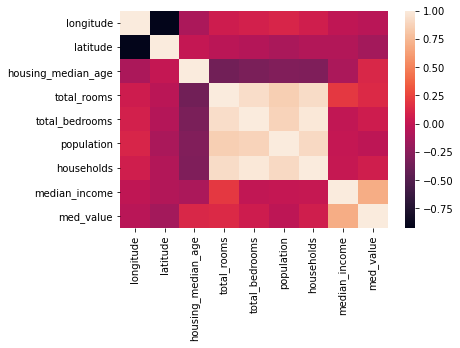

In [96]:
sns.heatmap(corr_matrix)

In [97]:
# how every attribute is connected with house`s cost
corr_matrix['med_value'].sort_values(ascending=False)

med_value             1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: med_value, dtype: float64

In [100]:
from ml_death_star import feature_engineering as fe

mi_real = fe.MIScoresRealVal(housing, housing["med_value"])

/Users/darji/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning:

Pass discrete_features=[False, False, False, False, False, False, False, False, False, True] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

array([[<AxesSubplot:xlabel='med_value', ylabel='med_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='med_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='med_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='med_value'>],
       [<AxesSubplot:xlabel='med_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='med_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='med_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='total_roo

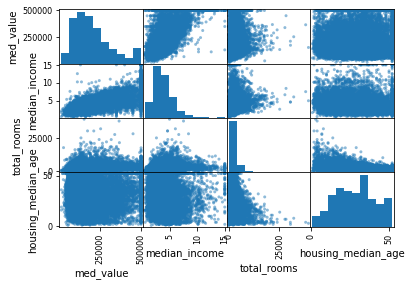

In [21]:
from pandas.plotting import scatter_matrix

attrs = ['med_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attrs])

In [22]:
# fig = make_subplots(rows=4, cols=4)

# fig.add_trace(go.Histogram(x=housing.med_value),
#              row=1,col=1)

# fig.add_trace(go.Scatter(x=housing.median_income, y=housing.med_value, mode='markers'),
#              row=1, col=2)

# fig.add_trace(go.Scatter(x=housing.total_rooms, y=housing.med_value, mode='markers'),
#              row=1, col=3)

# fig.add_trace(go.Scatter(x=housing.housing_median_age, y=housing.med_value, mode='markers'),
#              row=1, col=4)


In [99]:
px.scatter(housing, x='median_income', y='med_value', opacity=0.1)


## Making additional attributes which are *interesing to analyze*

In [101]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']


In [102]:
corr_matrix = housing.corr()
corr_matrix['med_value'].sort_values(ascending=False)

med_value                   1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: med_value, dtype: float64

# Preparing for ML algorithms

In [103]:
# return to clean train set

housing = strat_train_set.drop('median_house_value', axis='columns')
housing_labels = strat_train_set['median_house_value'].copy()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [104]:
housing_labels

17606    286600.0
18632    340600.0
14650    196900.0
3230      46300.0
3555     254500.0
           ...   
6563     240200.0
12053    113000.0
13908     97800.0
11159    225900.0
15775    500001.0
Name: median_house_value, Length: 16512, dtype: float64

## FUNCTIONS FOR CLEANING


*get rid of missing values*

In [105]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median') # missingvalues = np.nan

In [106]:
housing_numerical = housing.drop('ocean_proximity', axis=1)  # drop non-numerable attr for median counting
housing_numerical

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


In [108]:
# fit the training data
imputer.fit(housing_numerical)

SimpleImputer(strategy='median')

In [109]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [110]:
housing_numerical.median().values == imputer.statistics_

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [112]:
X = imputer.transform(housing_numerical)
X

array([[-121.89  ,   37.29  ,   38.    , ...,  710.    ,  339.    ,
           2.7042],
       [-121.93  ,   37.05  ,   14.    , ...,  306.    ,  113.    ,
           6.4214],
       [-117.2   ,   32.77  ,   31.    , ...,  936.    ,  462.    ,
           2.8621],
       ...,
       [-116.4   ,   34.09  ,    9.    , ..., 2098.    ,  765.    ,
           3.2723],
       [-118.01  ,   33.82  ,   31.    , ..., 1356.    ,  356.    ,
           4.0625],
       [-122.45  ,   37.77  ,   52.    , ..., 1269.    ,  639.    ,
           3.575 ]])

In [114]:
housing_train = pd.DataFrame(X, columns=housing_numerical.columns)
housing_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
2,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
16507,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
16508,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
16509,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
16510,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### Categorial and text attributes preprocessing

In [117]:
housing_categorical = housing['ocean_proximity']
housing_categorical.unique()

array(['<1H OCEAN', 'NEAR OCEAN', 'INLAND', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [36]:
housing_cat_encoded, housing_categories = housing_cat.factorize()

housing_cat_encoded

array([0, 0, 1, ..., 2, 0, 3])

#### one-hot encoding

In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=True)
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [38]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

#### Both transormations in 1 time

In [39]:
encoder = OneHotEncoder(sparse=False)
housing_cat_reshaped = housing_cat.values.reshape(-1, 1)
housing_cat_1hot = encoder.fit_transform(housing_cat_reshaped)

housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [40]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Creating special transformators

In [41]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix ] / X[:, household_ix]
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        return np.c_[X, rooms_per_household, population_per_household]
    

    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(X = housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

# Feature scaling - StandardScaler & MinMaxScaler
### convey

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribute_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.31205452,
        -0.08649871,  0.15531753],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.21768338,
        -0.03353391, -0.83628902],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.46531516,
        -0.09240499,  0.4222004 ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.3469342 ,
        -0.03055414, -0.52177644],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.02499488,
         0.06150916, -0.30340741],
       [-1.43579109,  0.99645926,  1.85670895, ..., -0.22852947,
        -0.09586294,  0.10180567]])

In [43]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attr_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attr_names].values

num_attribs = list(housing_num)
category_attrs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())

])

# dedicated pipeline for categorical data
categorical_pipeline = Pipeline([
    ('selector', DataFrameSelector(category_attrs)),
    ('category_encoder', OneHotEncoder(sparse=False))
])

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('categorical_pipeline', categorical_pipeline)
])


In [44]:
# launch pipeline
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

# Data choosing and training

In [45]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

#### *let`s go*

In [46]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print(f'Estimations: {lin_reg.predict(some_data_prepared)}\nLabels: {list(some_labels)}')

Estimations: [210944. 317984. 210560.  59136. 189888.]
Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [47]:
from sklearn.metrics import mean_squared_error as mse
housing_predictions = lin_reg.predict(housing_prepared)

lin_mse = mse(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.4605335198

# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [49]:
housing_predictions = tree_reg.predict(housing_prepared)
housing_predictions

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

In [50]:
tree_mse = mse(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse  #overfitted data

0.0

# K-fold cross-validation

In [51]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error',
                        cv=10)
tree_mse_scores = np.sqrt(-scores)

In [52]:
def display_scores(scores):
    print(f'Score sum: {scores}')
    print(f'Mean: {scores.mean()}')
    print(f'StDev: {scores.std()}')
    return



In [53]:
display_scores(tree_mse_scores) # - overfitted model

Score sum: [69327.01708558 65486.39211857 71358.25563341 69091.37509104
 70570.20267046 75529.94622521 69895.20650652 70660.14247357
 75843.74719231 68905.17669382]
Mean: 70666.74616904806
StDev: 2928.322738055112


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared,
                            housing_labels,
                            scoring='neg_mean_squared_error',
                            cv=10)


In [55]:
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Score sum: [66794.7804735  66957.87372188 70347.95244419 74746.98043944
 68033.1258127  71193.84183426 64969.63056405 68281.25232644
 71550.9178525  67670.15046282]
Mean: 69054.6505931775
StDev: 2731.887833782391


# Random Forests
### *(ensemble learning)*

In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [57]:
forest_mse = mse(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.0

In [58]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error',
                        cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Score sum: [49557.6095063  47584.54435547 49605.349788   52325.13724488
 49586.9889247  53154.87424699 48800.48987508 47880.32844243
 52958.68645964 50046.17489414]
Mean: 50150.018373763225
StDev: 1902.0697041387534


# Model saving...

In [59]:
import joblib
joblib.dump(forest_reg, 'forest_tree_model.pkl')

['forest_tree_model.pkl']

# ... and loading

In [60]:
loaded_model = joblib.load('forest_tree_model.pkl')

# Accurate model setting

In [61]:
from sklearn.model_selection import GridSearchCV

parameters_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, 
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, parameters_grid, cv=5 ,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [64]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

63433.40391736115 {'max_features': 2, 'n_estimators': 3}
56049.06443637957 {'max_features': 2, 'n_estimators': 10}
52824.848527310685 {'max_features': 2, 'n_estimators': 30}
60924.41328448018 {'max_features': 4, 'n_estimators': 3}
52713.650694157855 {'max_features': 4, 'n_estimators': 10}
50660.92190603788 {'max_features': 4, 'n_estimators': 30}
59604.01184459288 {'max_features': 6, 'n_estimators': 3}
52347.604952708156 {'max_features': 6, 'n_estimators': 10}
49923.3473574243 {'max_features': 6, 'n_estimators': 30}
59308.345962472304 {'max_features': 8, 'n_estimators': 3}
52320.77872780119 {'max_features': 8, 'n_estimators': 10}
50080.73594153239 {'max_features': 8, 'n_estimators': 30}
62160.41351492645 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54391.4645181866 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60269.48857946438 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52791.4337224519 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### If there is a lot of hyperparameter combinations, *randomized search* implies better

In [65]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(forest_reg, parameters_grid, cv=5, n_iter=30)

random_search.fit(housing_prepared, housing_labels)

/Users/darji/miniforge3/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning:

The total space of parameters 18 is smaller than n_iter=30. Running 18 iterations. For exhaustive searches, use GridSearchCV.



RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=30,
                   param_distributions=[{'max_features': [2, 4, 6, 8],
                                         'n_estimators': [3, 10, 30]},
                                        {'bootstrap': [False],
                                         'max_features': [2, 3, 4],
                                         'n_estimators': [3, 10]}])

In [66]:
random_search.best_params_

{'n_estimators': 30, 'max_features': 8}

In [67]:
random_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

# Analysis of best models and their mistakes

In [68]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.55720671e-02, 6.39878625e-02, 4.24072059e-02, 1.82928273e-02,
       1.68924417e-02, 1.75601900e-02, 1.66881781e-02, 3.03268232e-01,
       6.31565549e-02, 1.08958622e-01, 8.44196144e-02, 8.53515062e-03,
       1.73063945e-01, 8.08024120e-05, 2.96250425e-03, 4.15380176e-03])

### importance score corresponding to appropriate atribute name

In [69]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = categorical_pipeline.named_steps['category_encoder']

cat_encoder

OneHotEncoder(sparse=False)

In [70]:
cat_encoder.categories_[0]

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [71]:
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attribs

['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']

In [72]:
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [73]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.303268232301214, 'median_income'),
 (0.1730639450304893, 'INLAND'),
 (0.10895862174634888, 'pop_per_hhold'),
 (0.0844196144263057, 'bedrooms_per_room'),
 (0.07557206707255014, 'longitude'),
 (0.06398786252477989, 'latitude'),
 (0.06315655490931624, 'rooms_per_hhold'),
 (0.04240720593117474, 'housing_median_age'),
 (0.01829282732311651, 'total_rooms'),
 (0.017560189966804522, 'population'),
 (0.01689244166020893, 'total_bedrooms'),
 (0.01668817806453196, 'households'),
 (0.008535150622100876, '<1H OCEAN'),
 (0.0041538017589390725, 'NEAR OCEAN'),
 (0.0029625042500806965, 'NEAR BAY'),
 (8.080241203860085e-05, 'ISLAND')]

# Model estimation with TEST SAMPLE

In [74]:
final_model = grid_search.best_estimator_
random_model = random_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
Y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

X_test_prepared

array([[ 0.59238393, -0.71074948,  0.02758786, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.8571457 , -0.87445443,  0.8228579 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.26268061, -0.66865392, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.54242889, -0.68268578,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.12690297, -0.77155418, -0.13146615, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.33261768,  0.53808541, -0.76768218, ...,  0.        ,
         0.        ,  0.        ]])

In [75]:
final_predictions = final_model.predict(X_test_prepared)

final_mse = mse(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48760.26530172545

In [76]:
fianl2 = random_model.predict(X_test_prepared)

final_mse = mse(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48760.26530172545

# Confidence interval

In [77]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, 
                         len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([46743.6273187 , 50696.74792016])

# Excersises

## 1

In [82]:
from sklearn.svm import SVR



### 2

### 3

### 4

### 5